# Dataset Overview

*File Information:
- **File Name:** household_power_consumption.txt

*Columns:
1. **Date:** Date of the recorded data in the format DD/MM/YYYY.
2. **Time:** Time of the recorded data in the format HH:MM:SS.
3. **Global_active_power:** Total active power consumed by the household in kilowatts.
4. **Global_reactive_power:** Total reactive power consumed by the household in kilowatts.
5. **Voltage:** Voltage supplied to the household in volts.
6. **Global_intensity:** Total current intensity consumed by the household in amps.
7. **Sub_metering_1:** Active energy for kitchen in watt-hours per minute.
8. **Sub_metering_2:** Active energy for laundry in watt-hours per minute.
9. **Sub_metering_3:** Active energy for climate control in watt-hours per minute.

*Additional Informations:
- The dataset contains readings from household power consumption measurements.
- Columns 3 to 9 represent various measurements related to power consumption and energy usage.
- The data is recorded at intervals and provides insights into the household's electricity usage patterns.
- The dataset may contain missing values, which need to be handled appropriately during analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

In [3]:
df = pd.read_csv('../files/Household_electric_consumption/household_power_consumption.txt', delimiter=';', low_memory=False)
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
for column in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[column] = pd.to_numeric(df[column], errors='coerce')




# Global Active Power

## Statistics

In [4]:
global_active_power_stats = df['Global_active_power'].describe()
print("Statistics for Global Active Power:")
print(global_active_power_stats.apply(lambda x: format(x, '.2f')))


Statistics for Global Active Power:
count    2049280.00
mean           1.09
std            1.06
min            0.08
25%            0.31
50%            0.60
75%            1.53
max           11.12
Name: Global_active_power, dtype: object


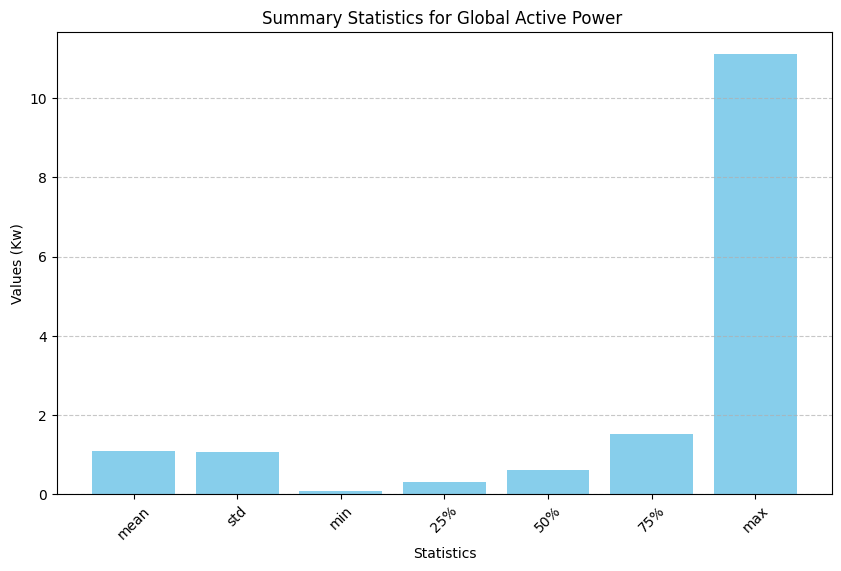

In [5]:
global_active_power_stats = global_active_power_stats.drop('count')
statistics_values = global_active_power_stats.values.astype(float)
statistics_index = global_active_power_stats.index
plt.figure(figsize=(10, 6))
plt.bar(statistics_index, statistics_values, color='skyblue')
plt.title('Summary Statistics for Global Active Power ')
plt.xlabel('Statistics')
plt.ylabel('Values (Kw)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Time Series Plot

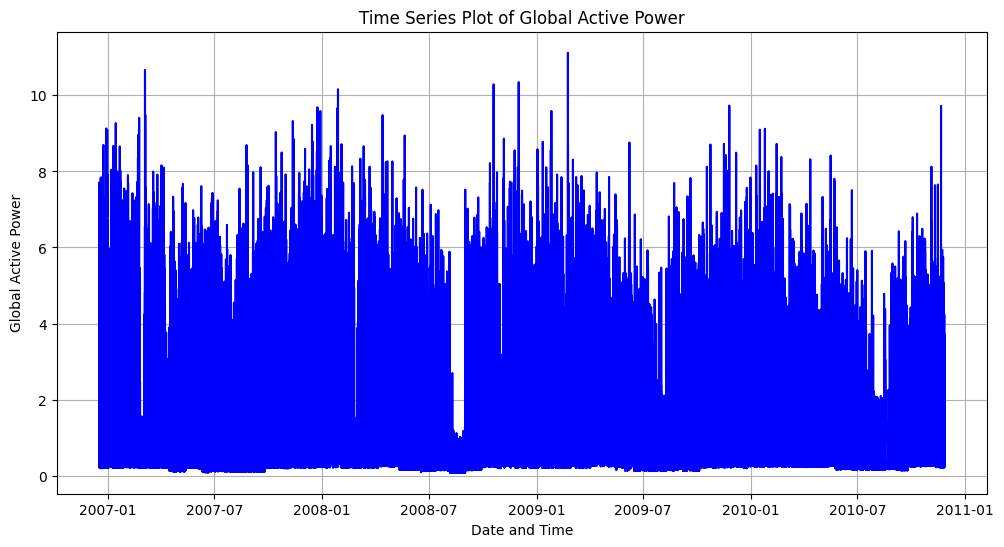

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Global_active_power'], color='blue')
plt.title('Time Series Plot of Global Active Power')
plt.xlabel('Date and Time')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()


# Global Reactive Power

## Statistics

In [7]:
global_reactive_power_stats = df['Global_reactive_power'].describe()
print("Statistics for Global Reactive Power:")
print(global_active_power_stats.apply(lambda x: format(x, '.2f')))

Statistics for Global Reactive Power:
mean     1.09
std      1.06
min      0.08
25%      0.31
50%      0.60
75%      1.53
max     11.12
Name: Global_active_power, dtype: object


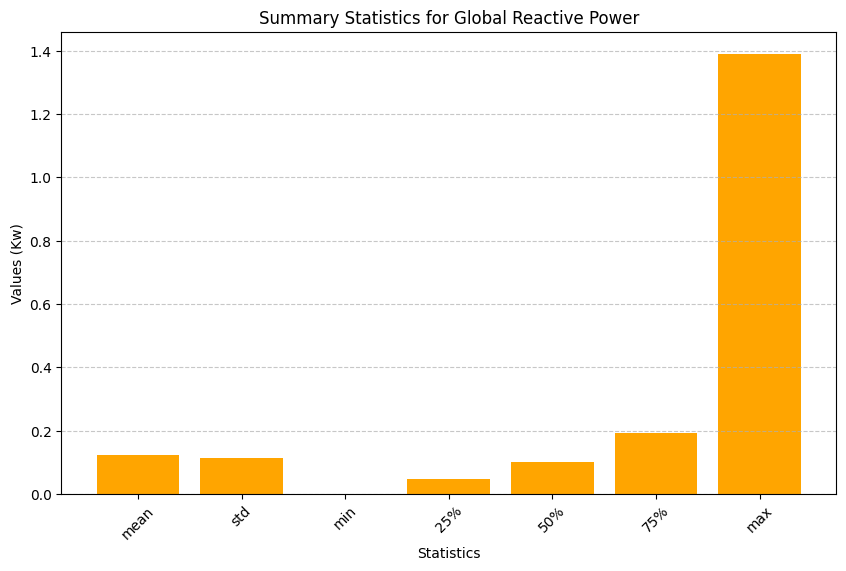

In [8]:
global_reactive_power_stats = global_reactive_power_stats.drop('count')
statistics_values = global_reactive_power_stats.values.astype(float)
statistics_index = global_reactive_power_stats.index
plt.figure(figsize=(10, 6))
plt.bar(statistics_index, statistics_values, color='orange')
plt.title('Summary Statistics for Global Reactive Power')
plt.xlabel('Statistics')
plt.ylabel('Values (Kw)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Time Series Plot

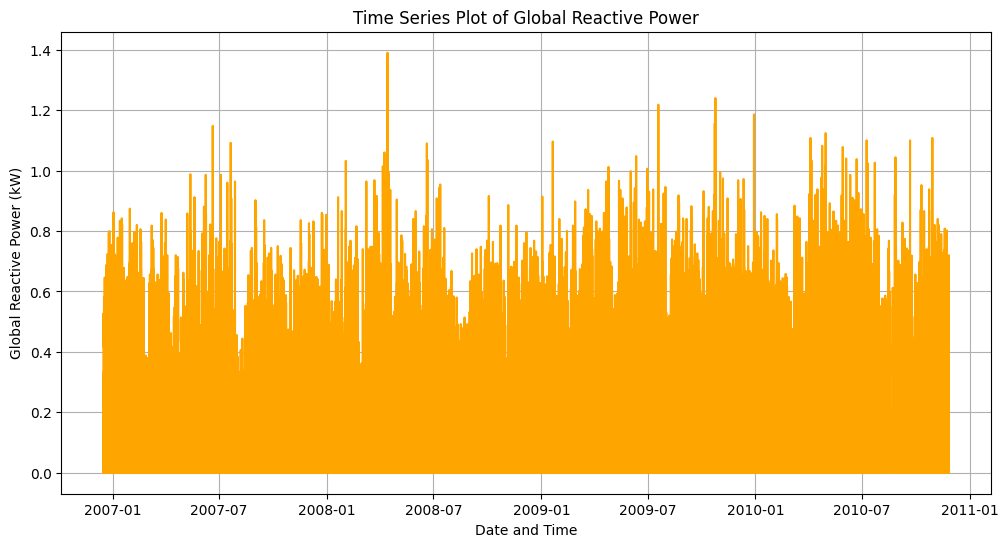

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Global_reactive_power'], color='orange')
plt.title('Time Series Plot of Global Reactive Power')
plt.xlabel('Date and Time')
plt.ylabel('Global Reactive Power (kW)')
plt.grid(True)
plt.show()

# Voltage

## Statistics

In [10]:
voltage_stats = df['Voltage'].describe().apply(lambda x: format(x, '.2f'))
print("Statistics for Voltage:")
print(voltage_stats)

Statistics for Voltage:
count    2049280.00
mean         240.84
std            3.24
min          223.20
25%          238.99
50%          241.01
75%          242.89
max          254.15
Name: Voltage, dtype: object


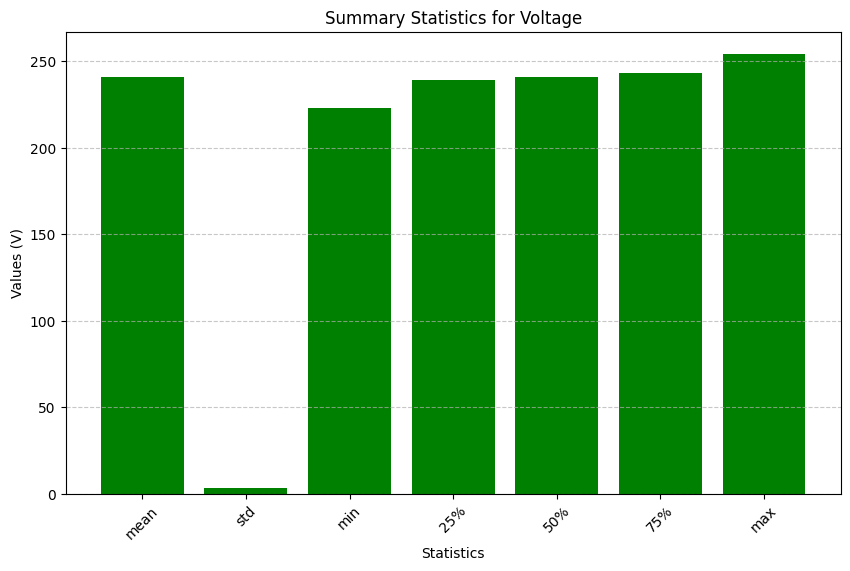

In [11]:
voltage_stats = voltage_stats.drop('count')
statistics_values = voltage_stats.values.astype(float)
statistics_index = voltage_stats.index
plt.figure(figsize=(10, 6))
plt.bar(statistics_index, statistics_values, color='green')
plt.title('Summary Statistics for Voltage')
plt.xlabel('Statistics')
plt.ylabel('Values (V)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Histogram of Voltage

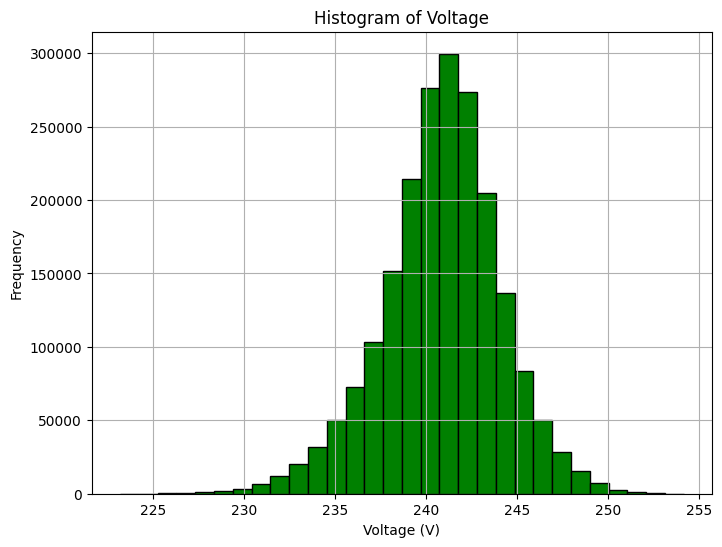

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['Voltage'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Global Intensity

## Statistics

In [13]:
print(df['Global_intensity'].describe().apply(lambda x: format(x, '.2f')))

count    2049280.00
mean           4.63
std            4.44
min            0.20
25%            1.40
50%            2.60
75%            6.40
max           48.40
Name: Global_intensity, dtype: object


Statistics for Global Intensity:
mean     4.63
std      4.44
min      0.20
25%      1.40
50%      2.60
75%      6.40
max     48.40
Name: Global_intensity, dtype: object


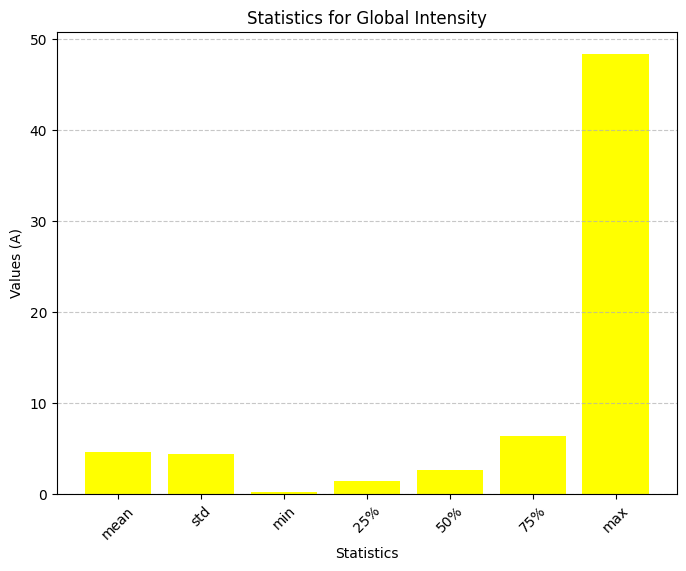

In [14]:
global_intensity_stats = df['Global_intensity'].describe().apply(lambda x: format(x, '.2f')).drop('count')
print("Statistics for Global Intensity:")
print(global_intensity_stats)
plt.figure(figsize=(8, 6))
plt.bar(global_intensity_stats.index, global_intensity_stats.values.astype(float), color='yellow')
plt.title('Statistics for Global Intensity')
plt.xlabel('Statistics')
plt.ylabel('Values (A)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Violin Plot

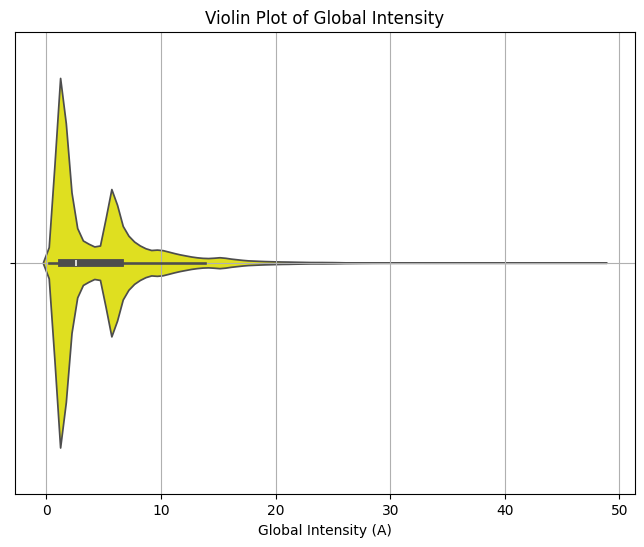

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Global_intensity'], color='yellow')
plt.title('Violin Plot of Global Intensity')
plt.xlabel('Global Intensity (A)')
plt.grid(True)
plt.show()

# Submeterings

## Statistics

In [16]:
sub_metering_stats = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].describe()
sub_metering_stats_formatted = sub_metering_stats.round(2)
print("Statistics for Sub Metering:")
print(sub_metering_stats_formatted)


Statistics for Sub Metering:
       Sub_metering_1  Sub_metering_2  Sub_metering_3
count      2049280.00      2049280.00      2049280.00
mean             1.12            1.30            6.46
std              6.15            5.82            8.44
min              0.00            0.00            0.00
25%              0.00            0.00            0.00
50%              0.00            0.00            1.00
75%              0.00            1.00           17.00
max             88.00           80.00           31.00


## Comparison 

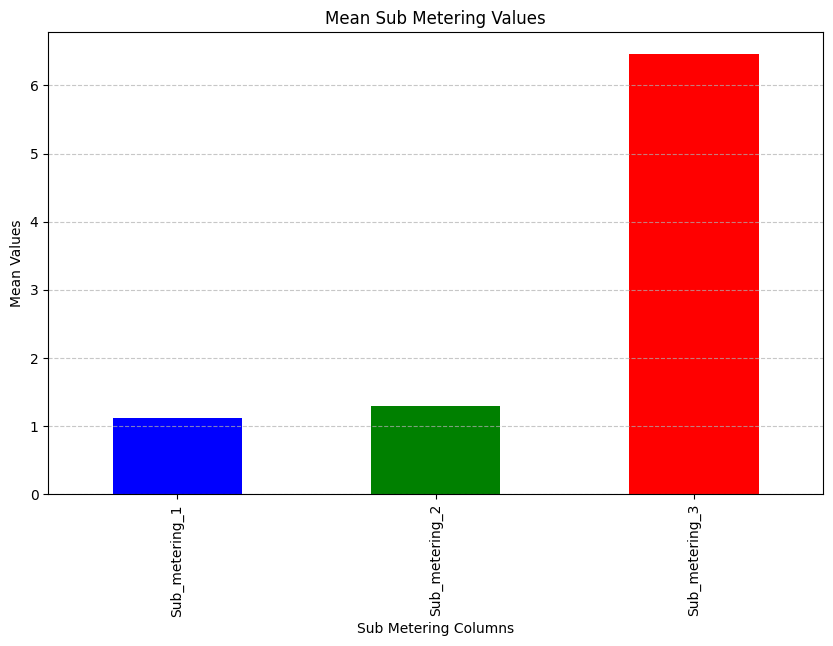

In [17]:
plt.figure(figsize=(10, 6))
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Mean Sub Metering Values')
plt.xlabel('Sub Metering Columns')
plt.ylabel('Mean Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Missing Values

Missing Values:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
DateTime                     0
dtype: int64


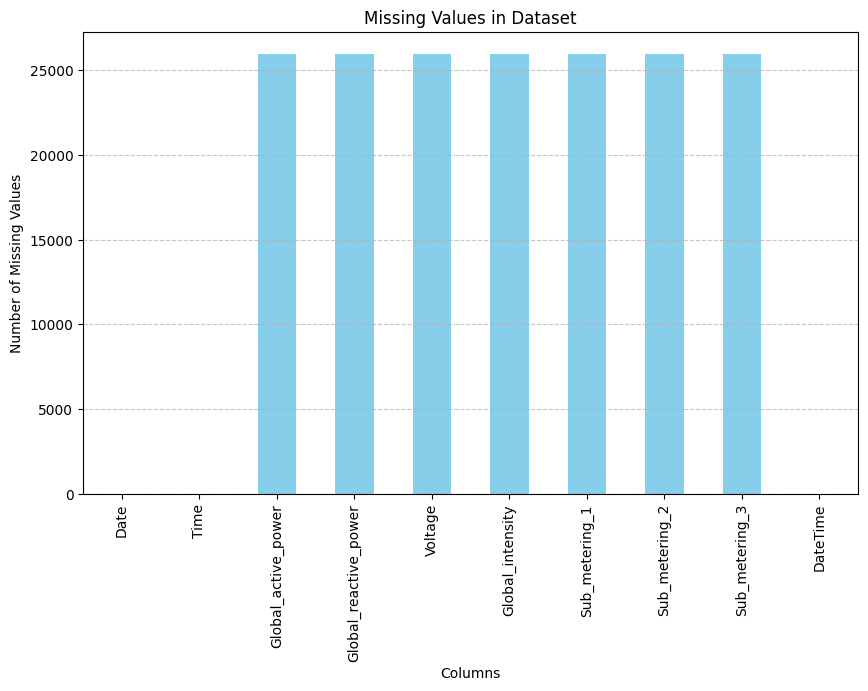

In [18]:
missing_values = df.isnull().sum()

# Print missing values
print("Missing Values:")
print(missing_values)

# Plot missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()